## Exercício 2

**Nome: Joao Victor Rocha**


**RA: 272618**


**Professora: Dr(a) Wu Shin Ting**

 
 - Exemplo 8.1 da refêrencia [29]

Este arquivo Markdown além de servir como resposta para o exercício proposto será também como um guia ou documentacao exemplificando passo a passo o processo de construcao de um gráfico para a visualizacao dos dados.


A visualização exploratória de dados é talvez o maior ponto forte que se tem ao utilizar tanto o R quanto o Python para a criacao de gráficos.

Ao utilizarmos estes ferramental é possível tansformar apidamente dados em gráficos com um equilíbrio único entre flexibilidade e facilidade.

Ao se construir gráficos é importante entender ou melhor visualizar os componentes existentes nele ou as "camadas" existentes em um gráfico, onde temos as seguintes camads:

OBS: Lembre-se sempre de respeitar o príncipio da gramática de gráficos.

    - Dados: É literalmente o seu database ou dataframe , que é nomeada como componente de dados

    - Geometria: Os gráficos podem assumir diferentes formas, como dispersao, histograma, boxplot e etc, entretanto é sempre importante ter em mente a geometria para expressar melhor a ideia que se quer passar com aquele gráfico sempre respeitando a gramática dos gráficos. 

    - Mapeamento estético: o gráfico usa várias "dicas" visuais para representar as informações fornecidas pelo dataset. Onde as informacoes mais importantes neste gráfico são as posições dos pontos nos eixos x e y, que representam as informacoes principais do meu dataset. Onde, cada ponto representa uma observação diferente, e mapeamos dados sobre essas observações. A cor é outra "dica" visual que mapeamos para a região. Chamamos isso de componente de mapeamento estético. Onde,a forma como definimos o mapeamento depende da geometria que se esta utilizando.


Tendo isso em mente os componentes ou camadas de um gráfico vamos gora iniciar a construcao do gráfico.


## Primeira Etapa:

A primeira etapa a se fazer é importar o conjunto de dados ao qual iremos construir os gráficos e para isso utilizamos os comandos as seguir:

In [28]:
import pandas as pd
muders_database = pd.read_csv(f"murders.csv")

muders_database


,state,abb,region,population,total
0,Alabama,AL,South,4779736,135
1,Alaska,AK,West,710231,19
2,Arizona,AZ,West,6392017,232
3,Arkansas,AR,South,2915918,93
4,California,CA,West,37253956,1257
5,Colorado,CO,West,5029196,65
6,Connecticut,CT,Northeast,3574097,97
7,Delaware,DE,South,897934,38
8,District of Columbia,DC,South,601723,99
9,Florida,FL,South,19687653,669


Logo após já ter feito a importacao do dataset, vamos importar a biblioteca plotnine que é a biblioteca equivalente ao ggplot2 em Python.

Como nos trechos de código abaixo nenhuma componente de geometria foi definida o que veremos é um gráfico em branco.

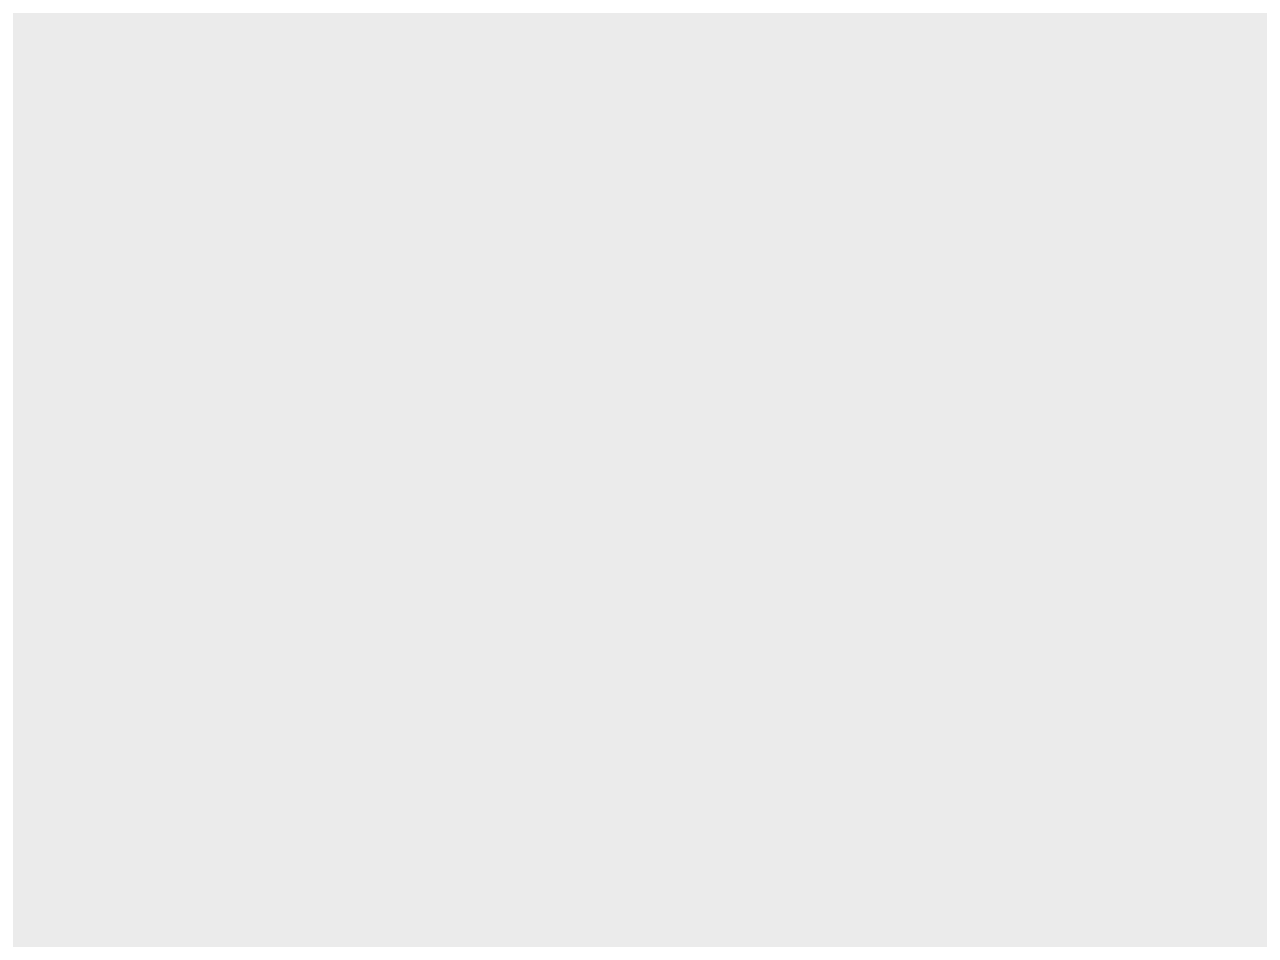

In [47]:
import numpy as np
from plotnine import (
    ggplot,
    aes,
    geom_point,
    geom_text,
    scale_x_log10,
    scale_y_log10,
    scale_x_continuous,
    scale_y_continuous,
    xlab,
    ylab,
    ggtitle,
    geom_abline,
    theme_seaborn,
    scale_color_discrete,
)
p1 = ggplot(data=muders_database)
p1

## Segunda Etapa:

Agora tendo em mente um pouco de como o plotnine funciona, podemos comecar a discutir sobre os mapeamentos estéticos.

Os mapeamentos estéticos descrevem como as propriedades dos meus dados se conectam aos recursos gráficos, como por exemplo a resolucao de um eixo, tamanho ou cor.

Para isso a funcao `aes()` conecta os dados do dataframe com o que vemos no gráfico, definindo ou realizando o mapeamento estético. ela é uma das funcoes mais importantes e será priomordial ou a base para a construcao de gráficos utilizando o plotnine


O trecho de código abaixo realiza o seguinte:

    - Utiliza a variavél `p1` do gráfico em branco plotado na Etapa 1 e acrescenta o mapeamento estético com geom_point(aes())

E portanto, o que podemos observar ao executar as linhas de código abaixo é:


`Gráfico de Dispersao do total de assinatos X a populacao em milhoes`


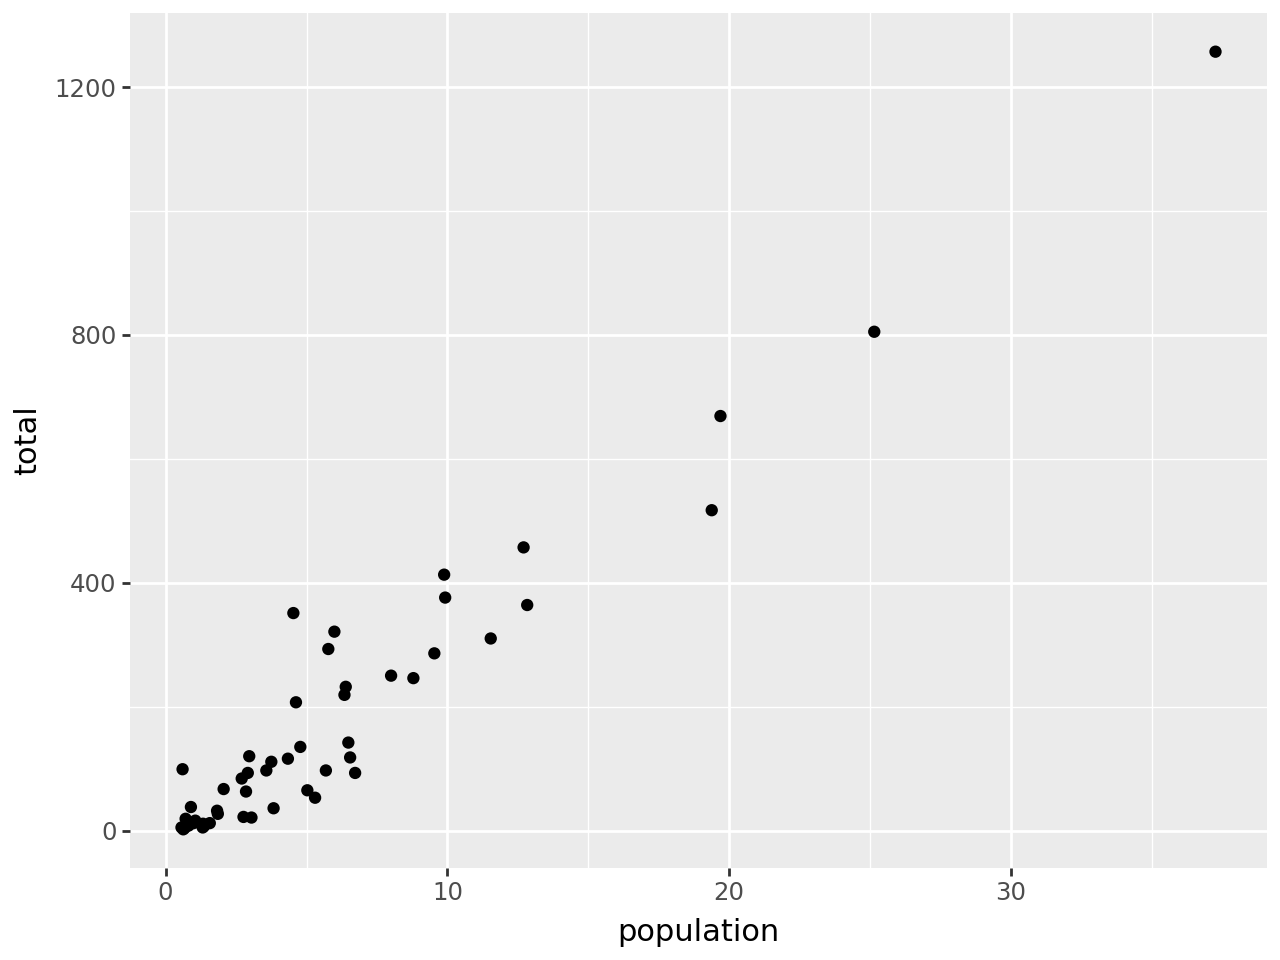

In [30]:

population = muders_database.population
total = muders_database.total

p1 + geom_point(aes(x = population / 10**6 , y = total))

Agora ainda na Etapa 2, vamos adicionar uma segunda camada ao gráfico. Nesta camada o que faremos é adicionar um rótulo a cada ponto do gráfico para identificar a qual estado dos Estados Unidos, representa aquele ponto no gráfico.

Para que isso seja possível, vamos utilizar as funcoes `geom_label()` e `geom_text()` que permite ao usuário adicionar texto ao gráfico com e sem retangulos atrás do texto respectivamente.

Como mencionado cada ponto no gráfico é um estado neste caso possui um rótulo, portanto precisamos de um mapeamento estético para fazer a conexão entre pontos e estes rótulos. Para isso basta utilizar o argumento `label = <label do dataframe>` da funcao `aes`

Portanto teremos o seguinte trecho de código e o gráfico:


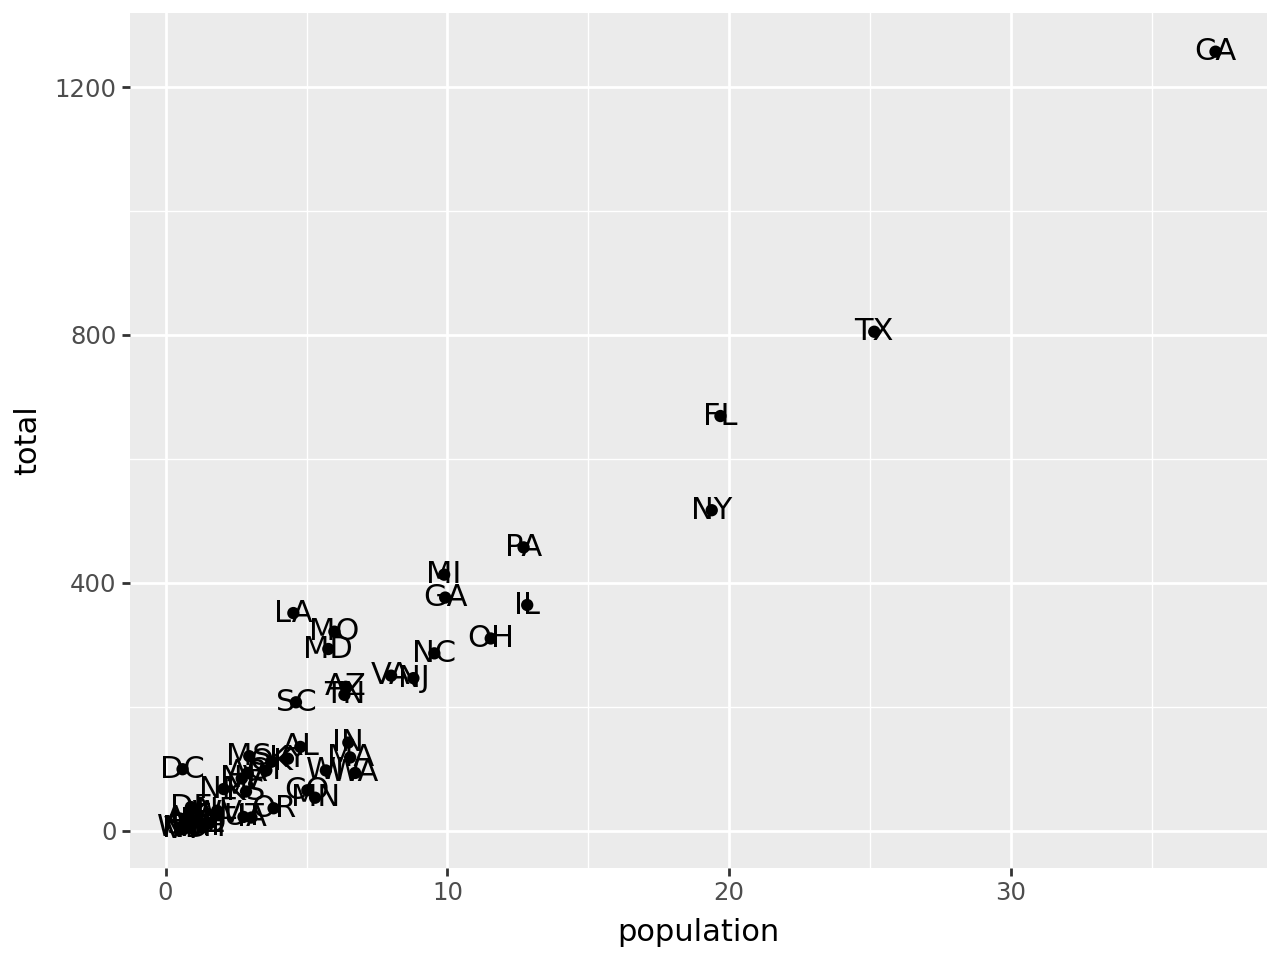

In [31]:
state = muders_database.abb
p1 + geom_point(aes(x = population/10**6 , y = total)) + geom_text(aes(population/10**6, total , label = state))

Agora vamos trabalhar manipulando alguns argumentos das funcoes `aes()`,`data`. É necessário manipulá-las pois, no gráfico que desejamos construir, os pontos sao menores que o tamanho padrão. e os rótulos estao muito em cima dos pontos o que contraria totalmente as boas práticas da gramática dos gráfico.

Na documentacao é possível ver que o argumento `size = ` é uma estética e podemos alterá-la assim:

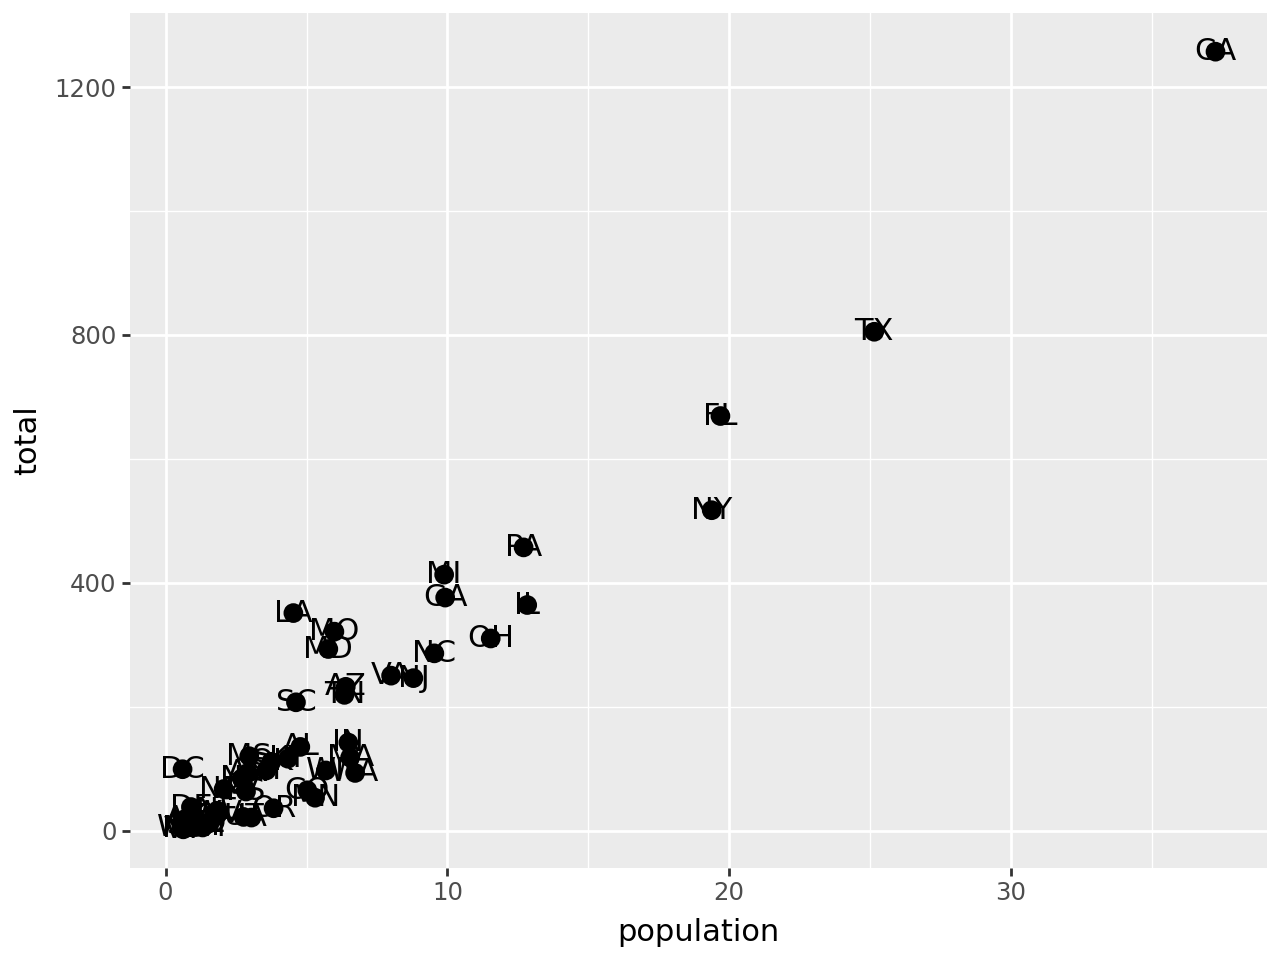

In [32]:
p1 + geom_point(aes(x = population/10**6 , y = total), size = 3) + geom_text(aes(population/10**6, total , label = state))

Para que fique bem claro `size` nao é um mapeamento, mas apenas um argumento. Pois todos os mapeamentos usam os dados das colunas do meu dataframe, e precisam estar sempre dentro de `aes()`

Agora, quanto utilizamos o `size = 3` o nosso gráfico aumentou os pontos do tamanho default para 3 o que dificultou ainda mais a visualizacao dos rótulos que nos informam a qual estado da federacao pertence aquele ponto no gráfico.

Para isso, vamos utilizar um argumento chamado `nudge_x`que move o texto ligeiramente no eixo x na direcao positiva do eixo cartesiano quando `nudge_x`>= 0 e para direcao negativa caso `nudge_x`< 0? veja abaixo:


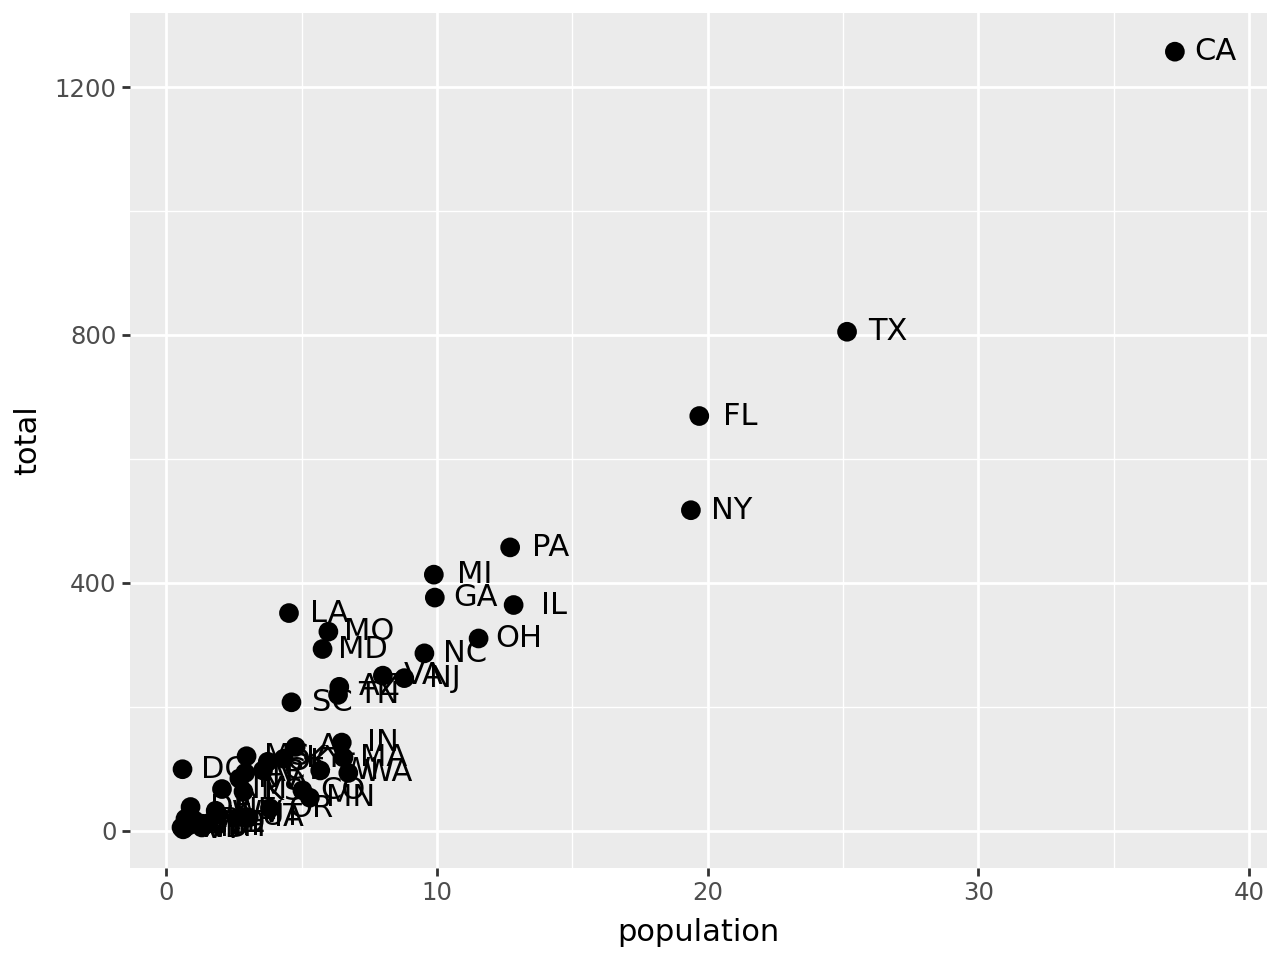

In [33]:
p1 + geom_point(aes(x = population/10**6 , y = total), size = 3) + geom_text(aes(population/10**6, total , label = state),nudge_x = 1.5)

Vamos agora discutir um pouco sobre os Mapeamentos estéticos globais x locais

Em algumas situacoes é meio trabalhoso ficar a todo plot de gráfico chamar uma linha de código tao grande para poder construir o gráfico como foi visto nas etapas anteriores. Tendo isso como vimos a Etapa 1
o plotnine nos fornece a função ggplot que contém um argumento que nos permite definir mapeamentos estéticos e com isso nao é mais necessário ficar chamando linhas de código tao grande:



In [34]:
model_graphics = ggplot(aes(population/10**6, total, label = state))

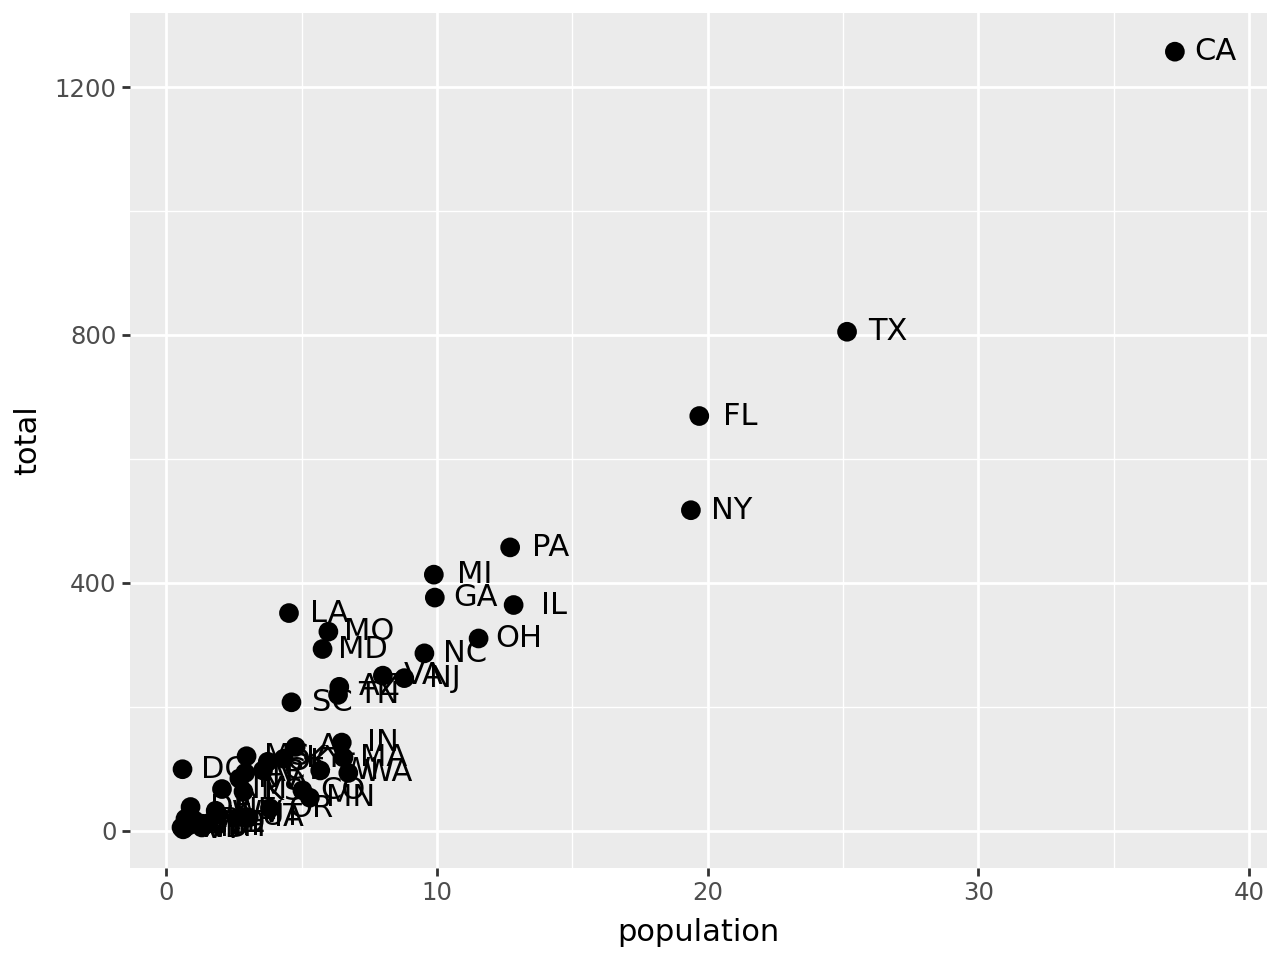

In [35]:
model_graphics + geom_point(size = 3) + geom_text(nudge_x = 1.5)

Agora, vamos falar um pouco sobre escalas após a plotagem dos gráficos é possível perceber que o comportamento dos pontos do gráfico estão em escala logarítmica. Este não é o padrão, portanto esta alteração precisa ser adicionada através de uma camada de escalas . Uma rápida olhada na documentacao revela que a função `scale_x_continuous` nos permite controlar o comportamento das escalas. Veja o código abaixo:

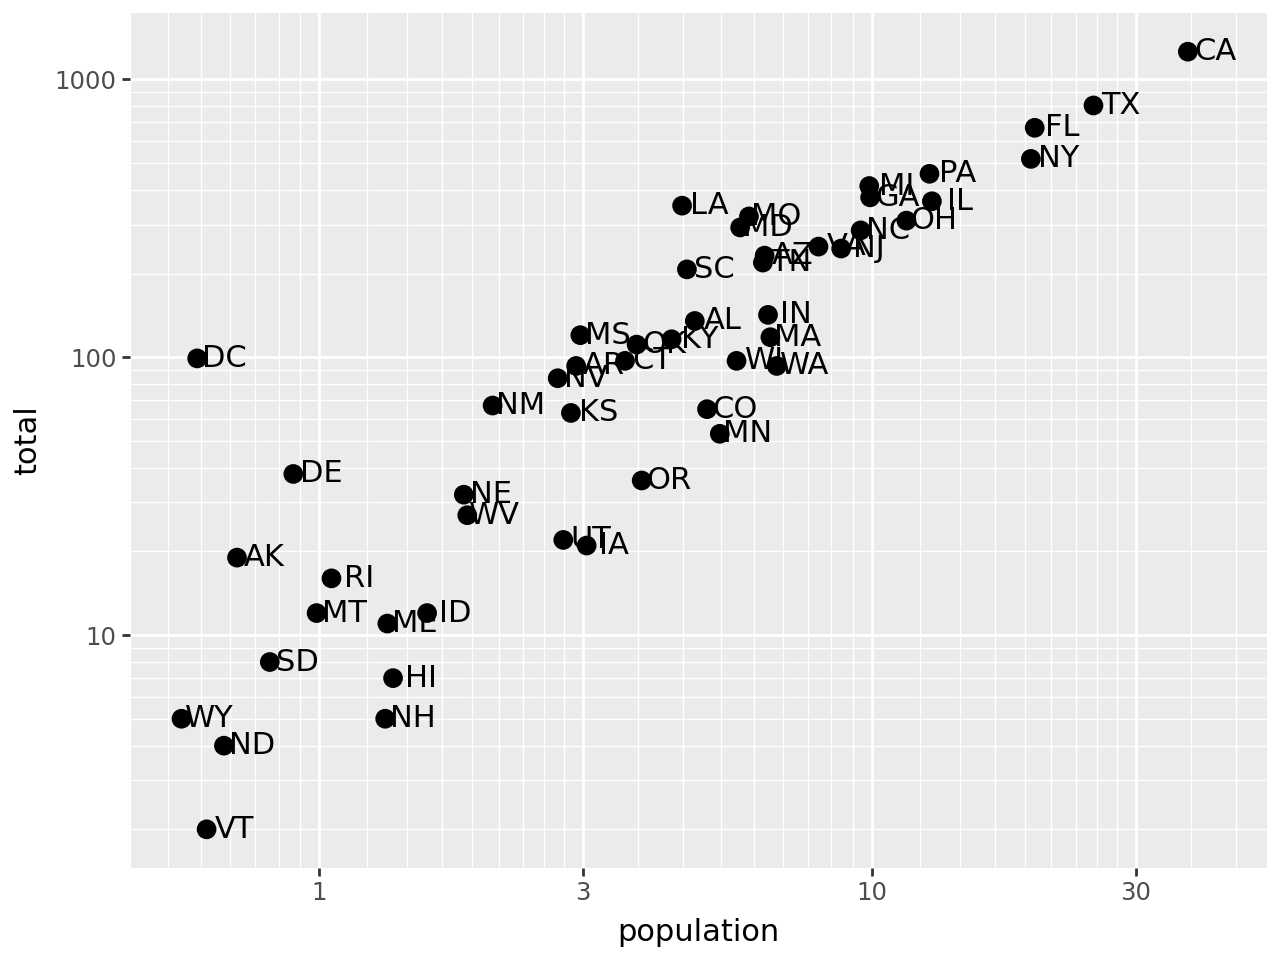

In [36]:
model_graphics + geom_point(size = 3) + geom_text(nudge_x = 0.05) + scale_x_continuous(trans = "log10") + scale_y_continuous(trans = "log10")

Entretanto, fazer essa "linearizacao" ou melhor utilizar essa escala logarítmica é tao comum que ja temos duas funcoes prontas e portanto o código pode ser resumido como sendo:

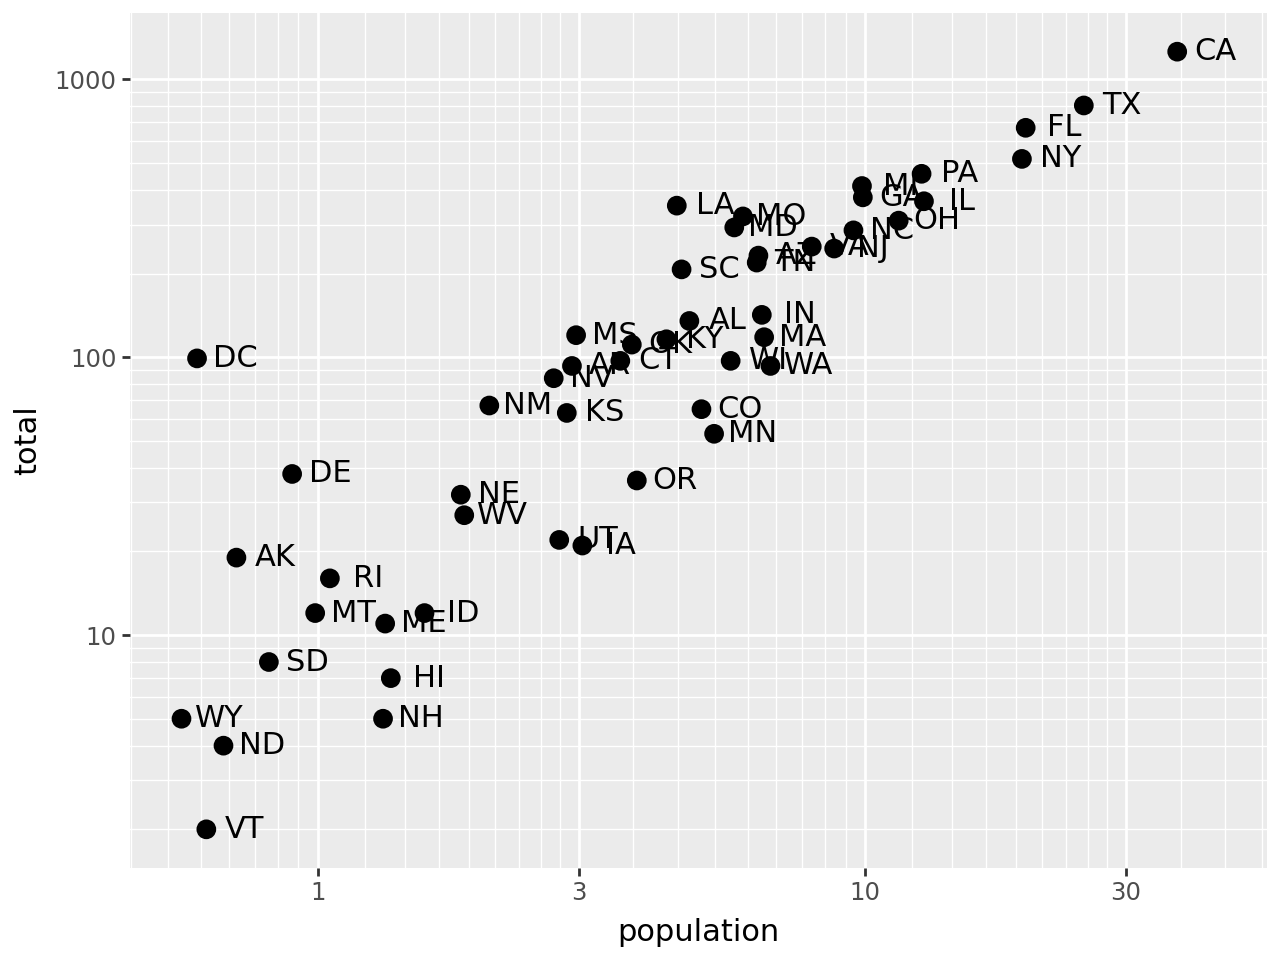

In [37]:
model_graphics + geom_point(size = 3) + geom_text(nudge_x = 0.07) + scale_x_log10() + scale_y_log10()

Agora vamos discutir um pouco sobre como alterar ou adiconar labels aos eixos e títulos aos nossos gráficos.

Da mesma forma que já fizemos, consultando a documentacao podemos ver dicas que exemplificam que para alterar os nomes dos eixos e o título podemos utilizar as seguintes funcoes:

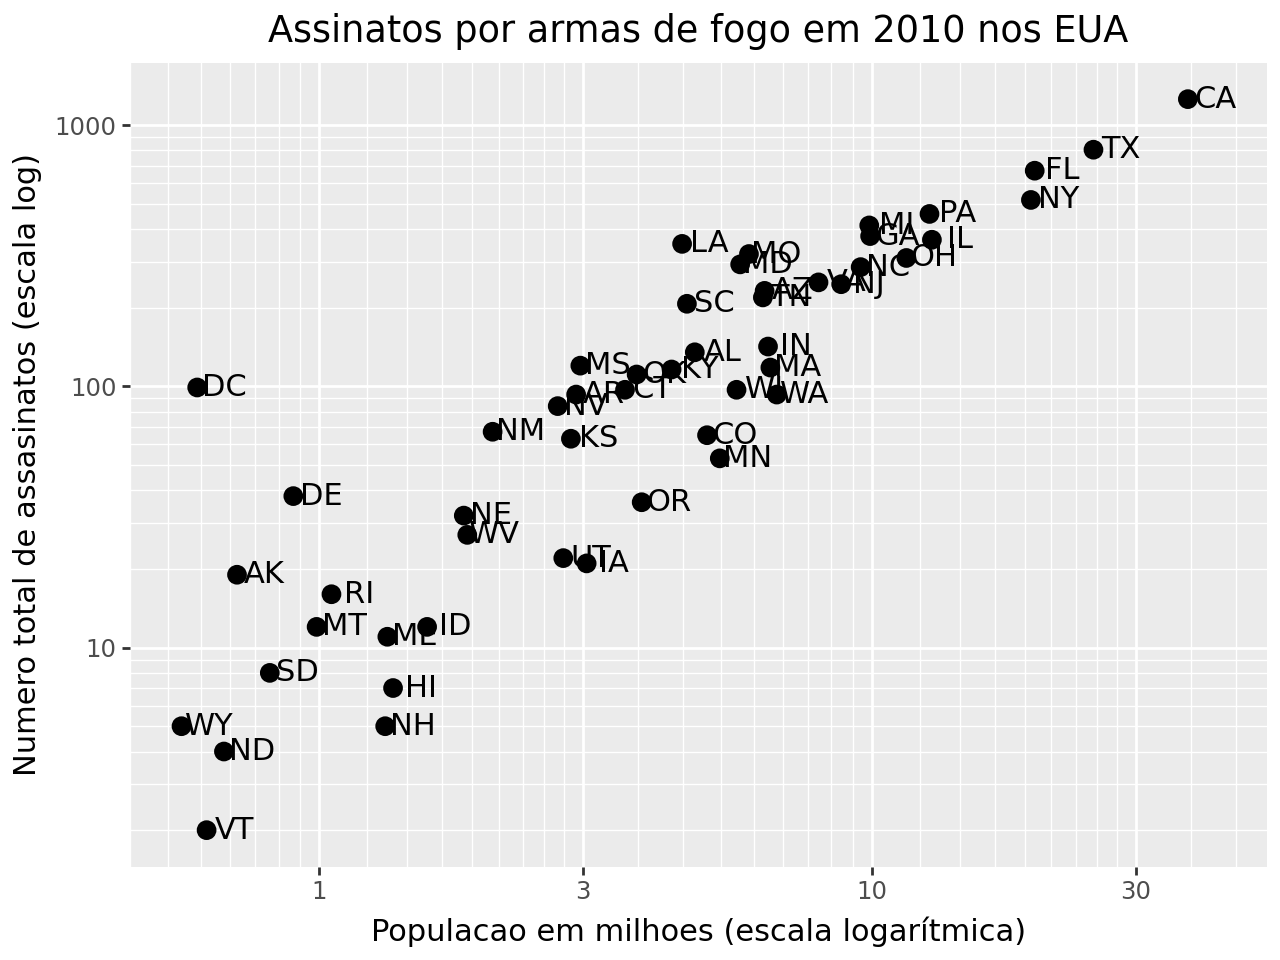

In [38]:
# Plotando novamente o gráfico:
model_graphics + geom_point(size = 3) + geom_text(nudge_x = 0.05) + scale_x_log10() + scale_y_log10() + xlab("Populacao em milhoes (escala logarítmica)") + ylab("Numero total de assasinatos (escala log)") + ggtitle("Assinatos por armas de fogo em 2010 nos EUA")

## Terceira Etapa:
Parabéns por chegar até aqui, agora já temos quase que um gráfico apresentável seguindo as boas práticas da gramática dos gráficos. Todavia, é interessante adicionarmos alguns estilos cores e legendas para que tenhamos um gráfico completo.


Para alterar a cor dos pontos devemos utilizar um argumento chamado `color` da funcao `geom_point` veja o trecho de código a seguir:

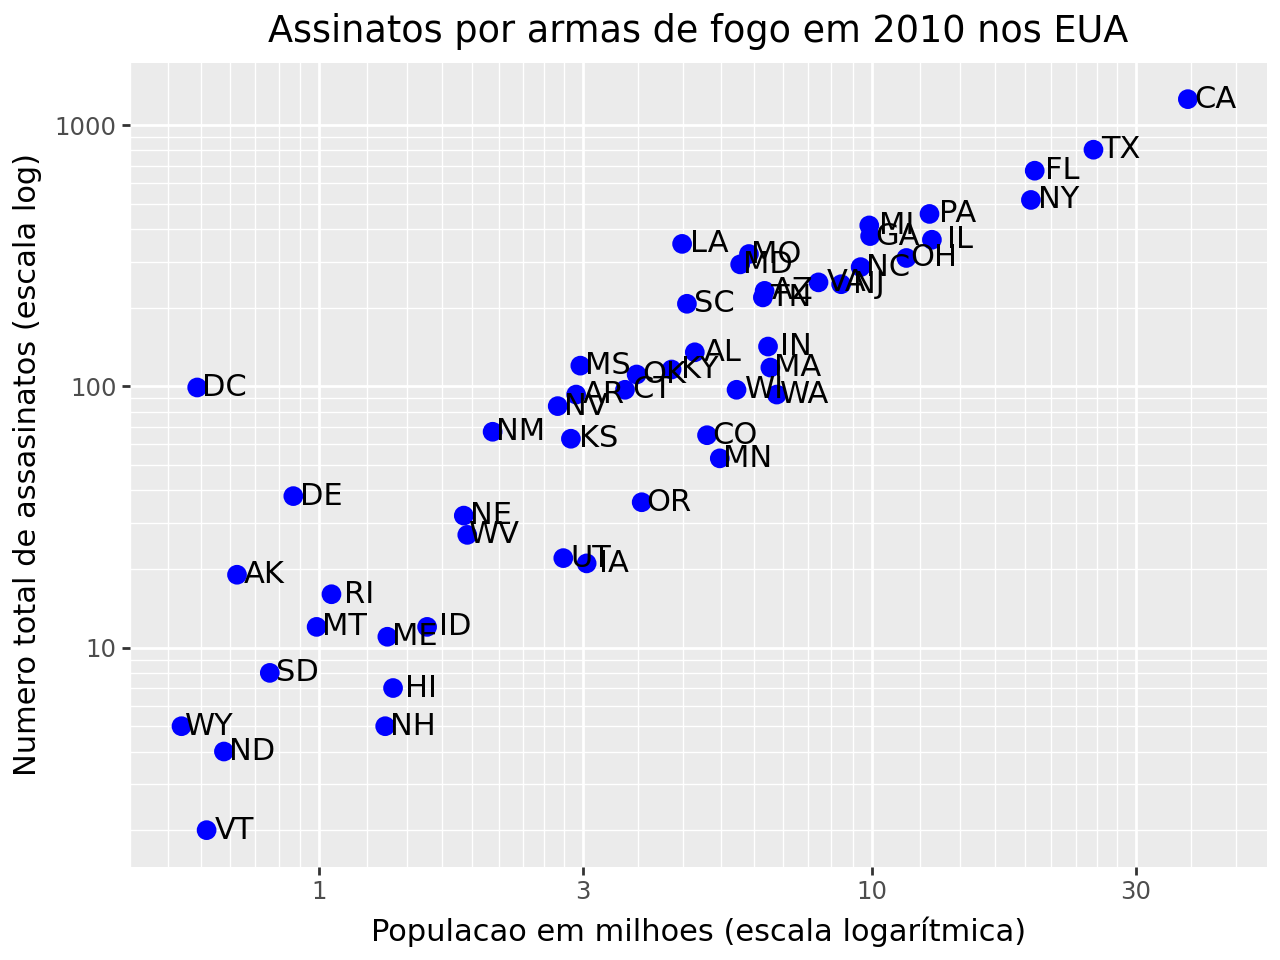

In [39]:
model_graphics + geom_point(size = 3, color= "blue") + geom_text(nudge_x = 0.05) + scale_x_log10() + scale_y_log10() + xlab("Populacao em milhoes (escala logarítmica)") + ylab("Numero total de assasinatos (escala log)") + ggtitle("Assinatos por armas de fogo em 2010 nos EUA")


Entretanto para apresentarmos o gráfico nao queremos que todos os pontos tenham a mesma cor, pois cada ponto representa um estado dos estados unidos que por sua vez estes estados sao de regioes geográficas diferentes sendo assim, queremos agrupar os estados da mesma regiao com uma determinada cor e os estados de outra determinada regiao de uma cor diferente da adotada anteriormente e atribuir uma legenda para os apresentar.

Entretanto, como a escolha da cor é determinada de cada observacao, trata-se de um mapeamento estético. e para mapeamentos estéticos devemos lembrar que utilizamos a funcao `aes()` Portanto utilizamos o seguinte código:


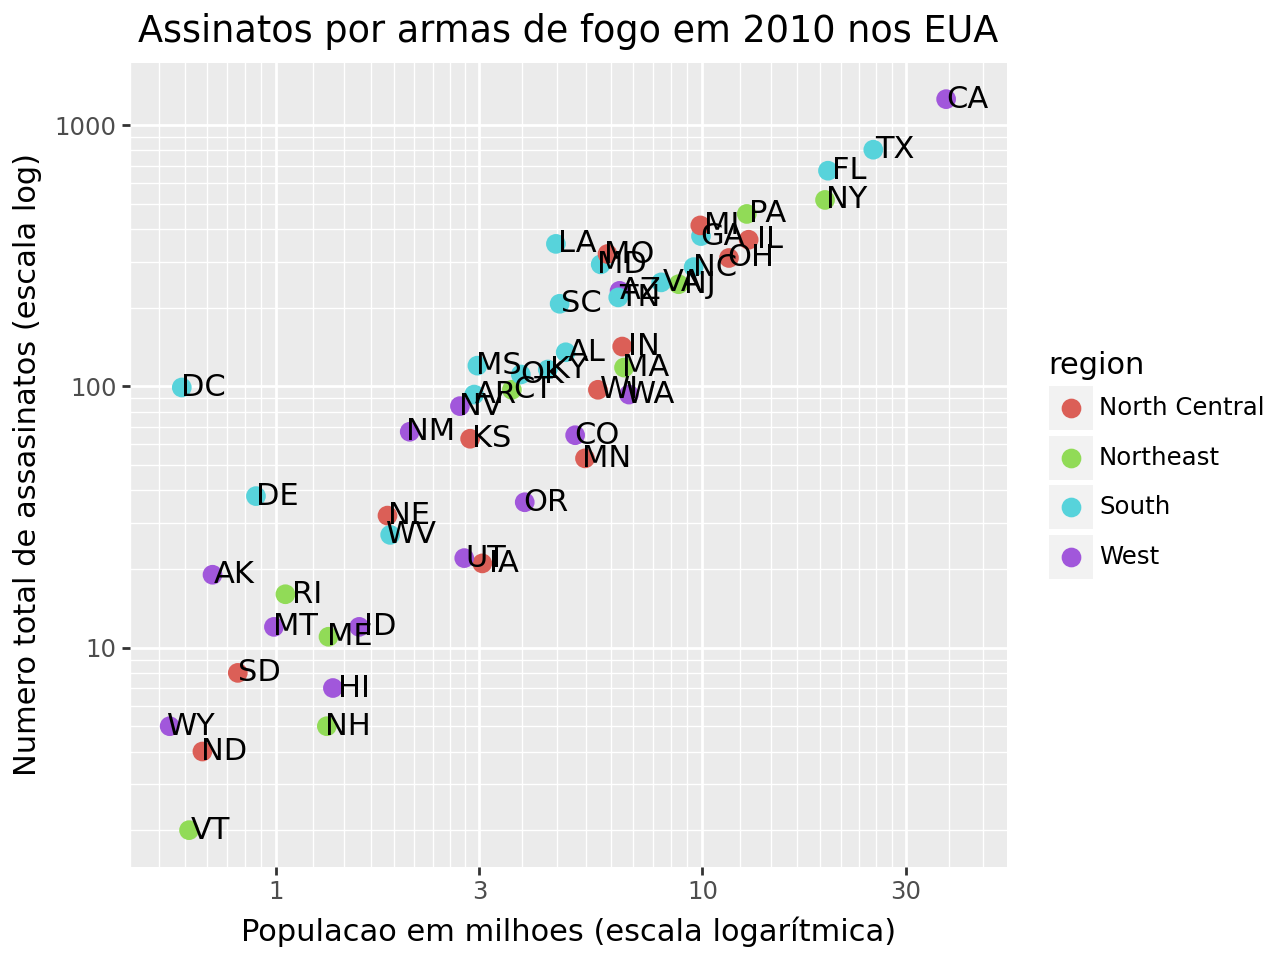

In [40]:
geo_region = muders_database.region
model_graphics + geom_point(aes(color = geo_region),size = 3) + geom_text(nudge_x = 0.05) + scale_x_log10() + scale_y_log10() + xlab("Populacao em milhoes (escala logarítmica)") + ylab("Numero total de assasinatos (escala log)") + ggtitle("Assinatos por armas de fogo em 2010 nos EUA")

Agora, vamos discutir um pouco sobre anotacoes,formas e ajustes como por exemplo o famoso ajuste linear.

Em diversas situacoes é necessário utilizar formas ou anotações a figuras que não são derivadas diretamente do mapeamento estético. Como por exemplo, caixas, áreas sombreadas e linhas.

Para o caso deste nosso estudo vamos utilizar o seguinte: uamoss adicionar uma linha que representa a taxa média de homicídios para todo o país. Uma vez que determinamos a taxa por milhão a ser 
R, esta linha é definida pela fórmula: sim = R.x, com nossos eixos sim e x sendo: total de assasinatos e populacao em milhoes, respectivamente. Na escala logarítmica esta linha se transforma em:
    - (sim) = registro(R)+registro(x)

Para isso, o R disponiabiliza duas funcoes para trabalhar com o calculo através da bilbioteca chamada dplyr. Entretanto, infelizmente nao existe ainda uma biblioteca em Python que seja compatível a esta do R e portanto, foi necessário utilizar de outras bibliotecas e artificios que possibilitassem que o cálculo fosse feito.


Para realizar o cálculo utilizamos, duas bibliotecas muito conhecidas que sao o **Pandas** e o **NumPy**.

O uso desta duas funcoes foi necessário pois para plotar o gráfico precisamos utilizar um método da biblioteca plotnine chamada geom_abline(), e este método espera receber como argumento um **DataFrame** ou um **Mapping** e portanto precisamos ter uma nova coluna do dataframe ou ter um novo dataframe.

Neste caso, foi optado por ter uma nova coluna a qual recebeu o nome de `rate`, e uma observacao importante é que o Pandas trata os `colchetes []` de formas diferentes:

- Quando tenho apenas um único `[]` o pandas trata o `column_name` ou melhor a coluna como uma série de pandas ou seja, trata a coluna ou linha como uma matriz unidimensional (vetor) e portanto, a saída será um vetor (float64)
- Quanto te nho dois `[[]]` o pandas trata a coluna como um dataframe e, portanto, a saída também é um **Dataframe** que é justamente o que precisamos para este caso.


E portanto, tendo os conhecimentos explandos em mente foi feita entao a criacao de uma nova coluna para o **DataFrame** nomeada de rate, onde fizemos os cálculos necessário para a regressao e armazenamos em uma váriavel nomeada de r. 

Veja abaixo o procedimento:


In [41]:
muders_database[['rate']] = (total.sum() / population.sum()) * 10 ** 6
r = muders_database[['rate']]
print(r)
type(r)


         rate
0   30.345549
1   30.345549
2   30.345549
3   30.345549
4   30.345549
5   30.345549
6   30.345549
7   30.345549
8   30.345549
9   30.345549
10  30.345549
11  30.345549
12  30.345549
13  30.345549
14  30.345549
15  30.345549
16  30.345549
17  30.345549
18  30.345549
19  30.345549
20  30.345549
21  30.345549
22  30.345549
23  30.345549
24  30.345549
25  30.345549
26  30.345549
27  30.345549
28  30.345549
29  30.345549
30  30.345549
31  30.345549
32  30.345549
33  30.345549
34  30.345549
35  30.345549
36  30.345549
37  30.345549
38  30.345549
39  30.345549
40  30.345549
41  30.345549
42  30.345549
43  30.345549
44  30.345549
45  30.345549
46  30.345549
47  30.345549
48  30.345549
49  30.345549
50  30.345549


pandas.core.frame.DataFrame

Após fazer os cálculos para a nova coluna do **DataFrame** e armazenar na variavel r, se fez necessário mais uma etapa antes de realizar o plot com a regressao linear. 

Este passo se faz necessário pois, se olharmos anteriormente foi feita a aplicacao de uma escala de log em nosso gráfico através da funcao scale_x_log e scale_y_log. E portanto, precisamos aplicar log10() em nossa variavel r.

Portanto, para poder ser possível utilizamos o numpy que já tem pronto uma funcao log10, logo aplicamos o log10 e guardamos este resultado em uma variavel nomeada de linear_r como pode ser visto abaixo:



In [42]:
linear_r = np.log10(r)
linear_r
type(linear_r)

pandas.core.frame.DataFrame

Por fim, agora com todos os cálculos feitos, o que precisamos é apenas de plotar o gráfico com o desenho da regressao e utilizamos entao o método geom_abline() informando qual é o intercept, e neste caso como o slope é 0 nao é necessário informar. 
Veja abaixo:

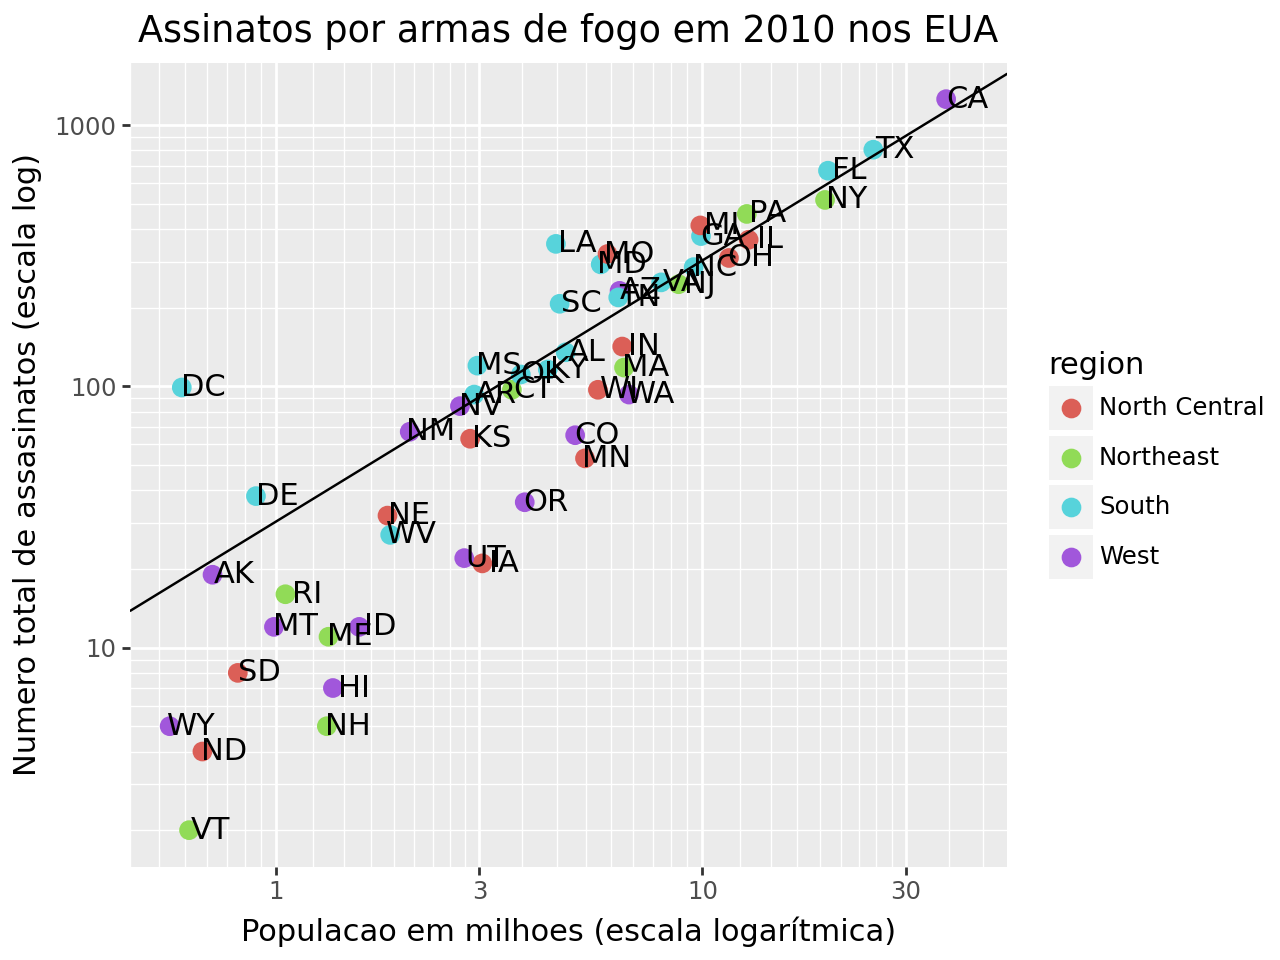

In [43]:
model_graphics + geom_point(aes(color = geo_region),size = 3) + geom_text(nudge_x = 0.05) + scale_x_log10() + scale_y_log10() + xlab("Populacao em milhoes (escala logarítmica)") + ylab("Numero total de assasinatos (escala log)") + ggtitle("Assinatos por armas de fogo em 2010 nos EUA") + geom_abline(intercept = linear_r)

Após ter plotado, temos também tanto no R quanto no plotnine uma funcionalidade que nos permite alterar a cor da regressao linear e torná-la cinza para que nao comprometa ou fique por cima dos dados veja abaixo:

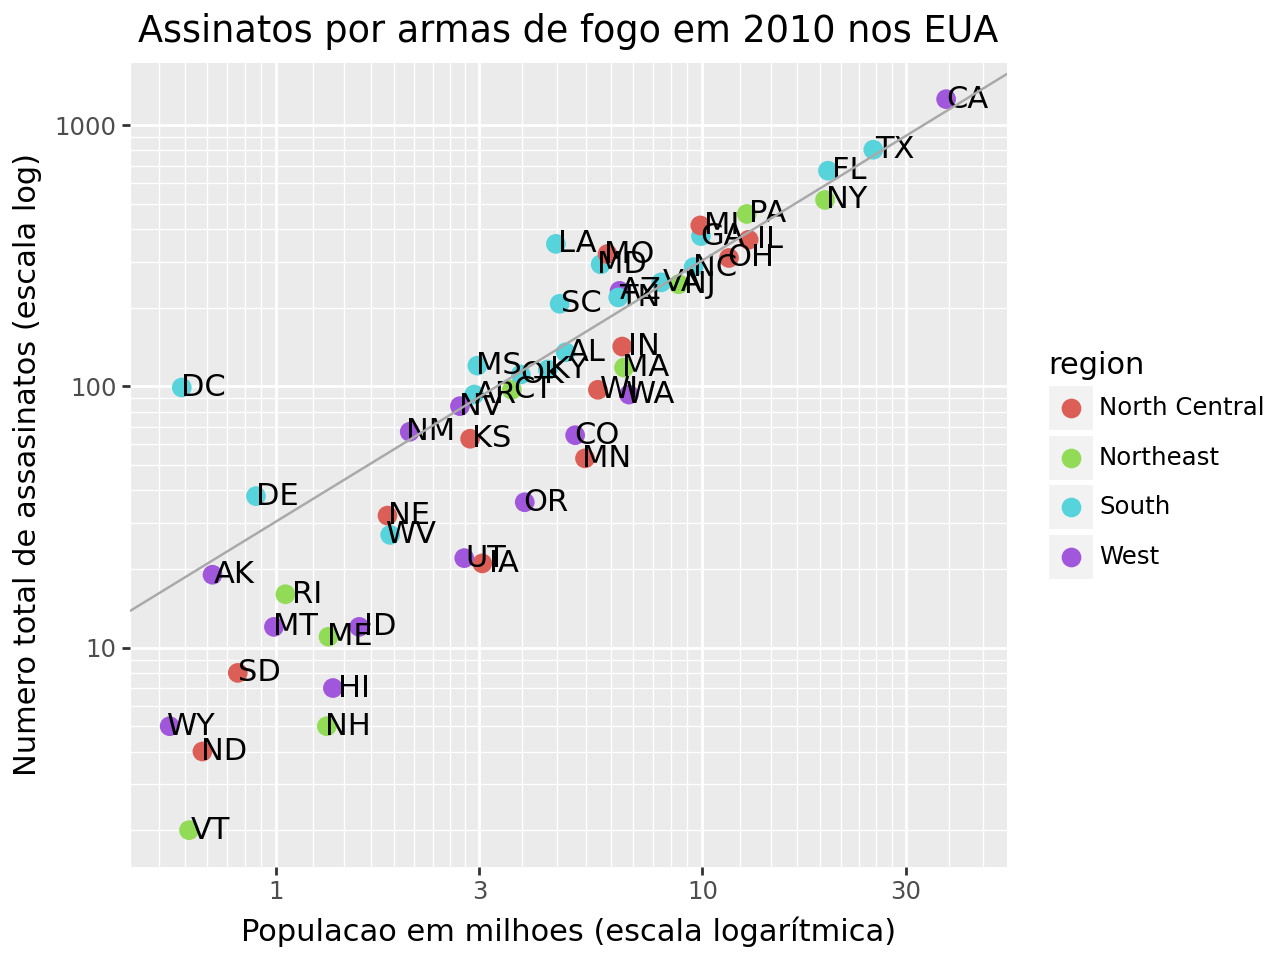

In [44]:
model_graphics + geom_point(aes(color = geo_region),size = 3) + geom_text(nudge_x = 0.05) + scale_x_log10() + scale_y_log10() + xlab("Populacao em milhoes (escala logarítmica)") + ylab("Numero total de assasinatos (escala log)") + ggtitle("Assinatos por armas de fogo em 2010 nos EUA") + geom_abline(intercept = linear_r, color = "darkgray")

E por fim a biblioteca do plotnine, nos trás outros dois métodos importantes ao se construir gráficos respeitando as boas práticas da gramática dos gráficos que sao os `themes()` e também o método `scale_color_discrete()` Veja abaixo o gráfico completo:

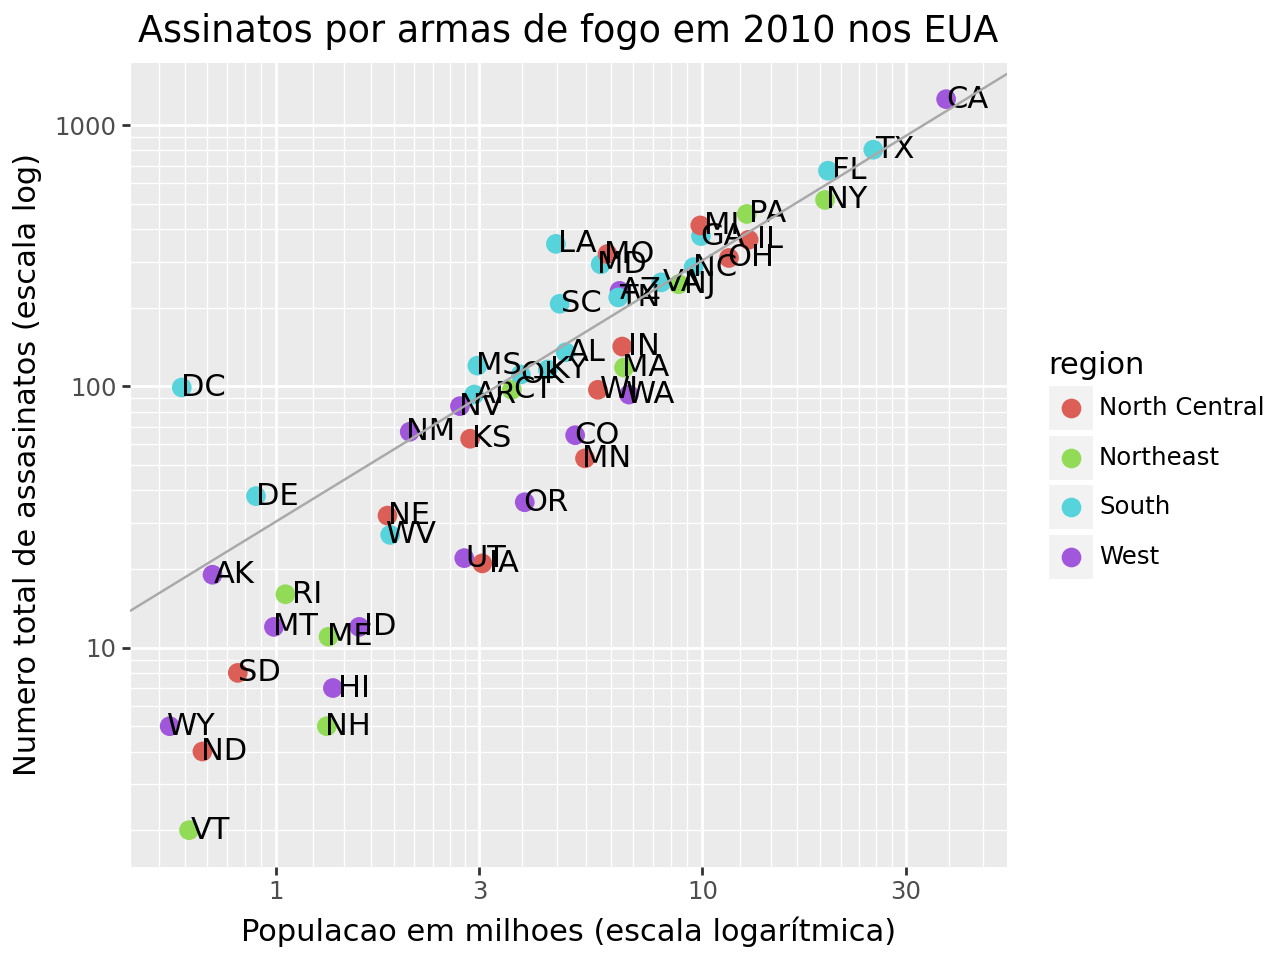

In [45]:
model_graphics + geom_point(aes(color = geo_region),size = 3) + geom_text(nudge_x = 0.05) + scale_x_log10() + scale_y_log10() + xlab("Populacao em milhoes (escala logarítmica)") + ylab("Numero total de assasinatos (escala log)") + ggtitle("Assinatos por armas de fogo em 2010 nos EUA") + geom_abline(intercept = linear_r, color = "darkgray")

Antes de finalizar, é interessante lembrar que o plotnine também oferece alguns temas para alterar o estilo do gráfico para seja possível alterar o fundo e outras "perfumarias"do gráfico. Entretanto, o ggplot2 tem alguns themes que nao existem na plotnine e neste caso foi utilizado o `theme_seaborn()`

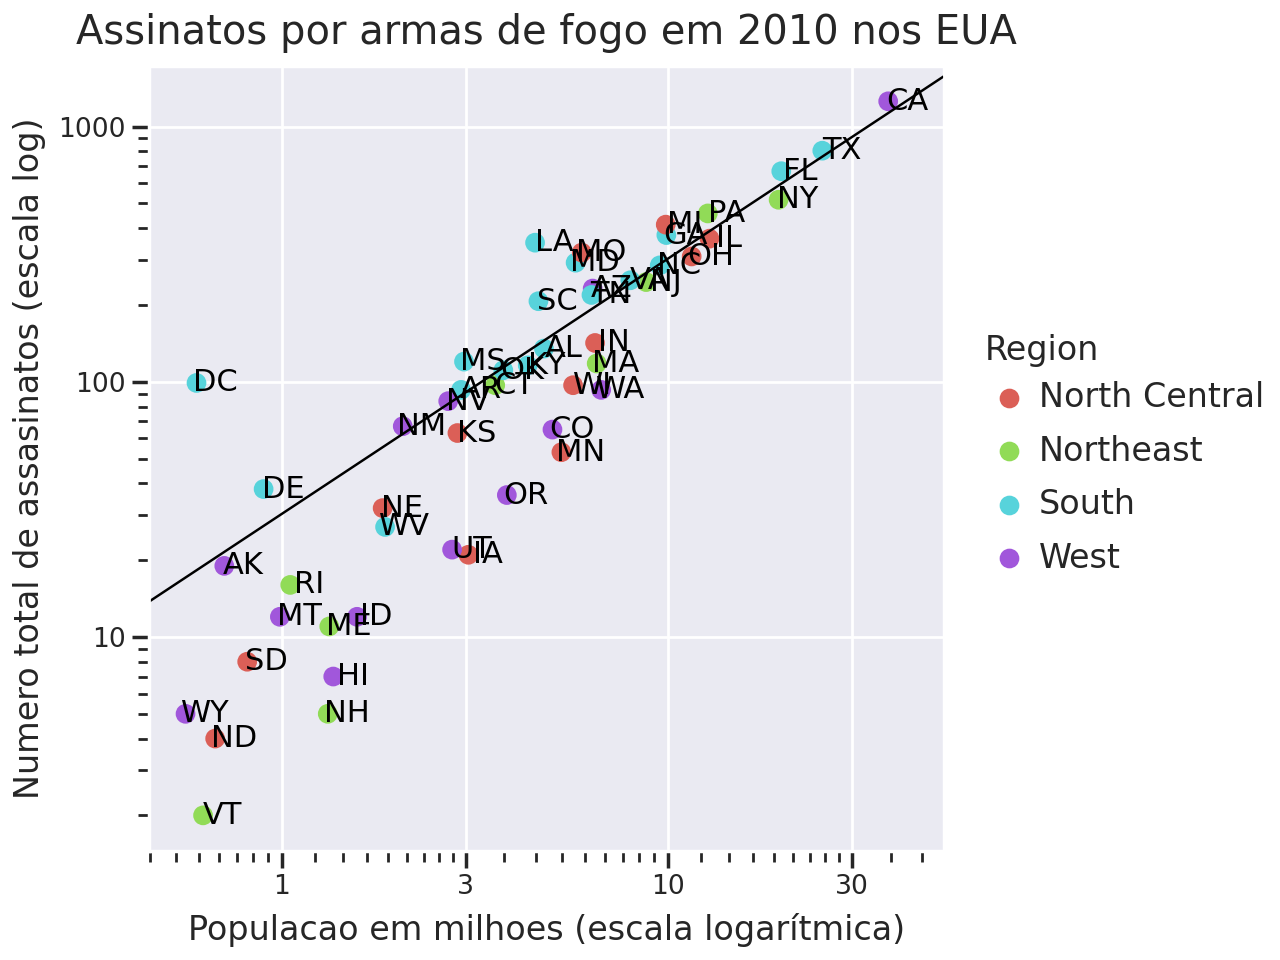

In [48]:
model_graphics + geom_point(aes(color = geo_region),size = 3) + geom_text(nudge_x = 0.05) + scale_x_log10() + scale_y_log10() + xlab("Populacao em milhoes (escala logarítmica)") + ylab("Numero total de assasinatos (escala log)") + ggtitle("Assinatos por armas de fogo em 2010 nos EUA") + geom_abline(intercept = linear_r)  + scale_color_discrete(name = "Region") + theme_seaborn()

Sendo assim, podemos concluir que o plotnine é uma excelente biblioteca para construir gráficos, respeitando os principios da gramática dos gráficos, criando excelentes gráficos. Entretanto, como nem tudo é perfeito ele também falha ao nao possuir, algumas funcionalidades que encontramos no ggplot2 do R. Porém, estas funcionalidades sao facilmente substituidas por outras bibliotecas existentes no Python e protanto, o plotnine ainda sim é uma excelente escolha.

#### Para reproduzir os passos utilize-se os seguintes pacotes:
~~~shell
- python>=3.9.18
- numpy >=1.26.4
- pandas>=2.2.1
- plotnine>=0.13.2
~~~

## Referências
1) https://rafalab.dfci.harvard.edu/dsbook/ggplot2.html
2) https://plotnine.org/
3) https://pandas.pydata.org/docs/index.html
4) https://acesse.dev/skojw
5) https://numpy.org/doc/stable/reference/generated/numpy.log10.html
